In [1]:
import sys
sys.path.append('../')
import torch
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
from model import NetV2
from torch.utils.data import DataLoader, SequentialSampler
from tqdm import tqdm
from torch.optim import Adam

### Control experiment: Not using masks and no dropout
This notebook evaluates the performance of not using any masks and no dropout layer

In [2]:
transform = transforms.Compose([
    transforms.RandomRotation(degrees=180),
    transforms.ToTensor(), transforms.GaussianBlur(kernel_size=7, sigma=(4, 5)),  # Stronger blur
    transforms.Lambda(lambda x: torch.flatten(x)),
])

In [3]:
dataset1 = datasets.MNIST('../data', train=True, download=True,
                       transform=transform)
dataset2 = datasets.MNIST('../data', train=False,
                       transform=transform)


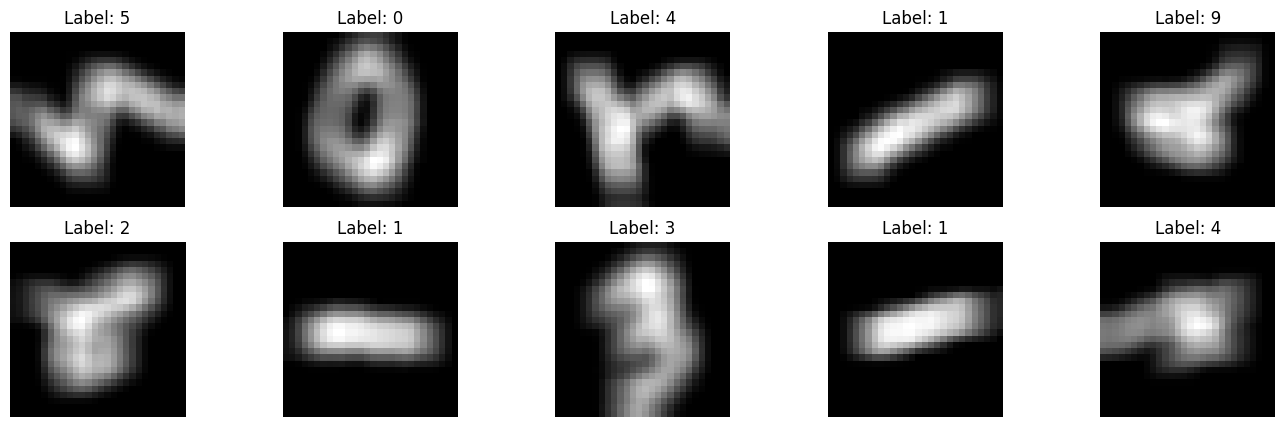

In [4]:
num_images = 10

# Plot multiple images
fig, axes = plt.subplots(2, num_images // 2, figsize=(17, 5))

for i in range(num_images):
    image, label = dataset1[i]  # Get image and label
    image_np = image.reshape(28, 28).squeeze().numpy()  # Convert to NumPy

    ax = axes[i // (num_images // 2), i % (num_images // 2)]
    ax.imshow(image_np, cmap="gray")
    ax.set_title(f"Label: {label}")
    ax.axis("off")

In [5]:
BATCH_SIZE = 32
EPOCHS = 10
NUM_MASKS = 1
LR = 0.001

In [6]:
seed = 42
torch.manual_seed(seed)
train_dataloader = DataLoader(dataset1, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(dataset2)

### Overfitting portion (make dropout probabilites 0 to indicates fully connected)

In [7]:
model = NetV2(num_masks=NUM_MASKS, dropout_probs=[0, 0])
opt = Adam(model.parameters(), lr=LR)
lossFn = torch.nn.NLLLoss() # Use NLL since we our model is outputting a probability


In [8]:
for i in range(EPOCHS):
    model.train()
    trainCorrect = 0
    totalLoss = 0
    for idx, (x, y)  in tqdm(enumerate(train_dataloader)):
        logits = model.forward(x, mask = idx % NUM_MASKS)
        loss = lossFn(logits, y)
        totalLoss += loss.item()
        opt.zero_grad()
        loss.backward()
        opt.step()
        trainCorrect += (logits.argmax(1) == y).type(
			torch.float).sum().item()
    print(f"Train Accuracy: {trainCorrect/len(dataset1)}")
    print(f"Total loss: {totalLoss}")

1875it [00:32, 57.34it/s]


Train Accuracy: 0.6423333333333333
Total loss: 1914.7832309007645


1875it [00:24, 76.34it/s]


Train Accuracy: 0.8296333333333333
Total loss: 977.3163135051727


1875it [00:22, 83.64it/s]


Train Accuracy: 0.8624833333333334
Total loss: 794.0127150714397


1875it [00:22, 81.55it/s]


Train Accuracy: 0.8819166666666667
Total loss: 687.8446591570973


1875it [00:27, 69.26it/s]


Train Accuracy: 0.89155
Total loss: 622.2628808245063


1875it [00:26, 71.38it/s]


Train Accuracy: 0.8992333333333333
Total loss: 585.721141455695


1875it [00:24, 75.77it/s]


Train Accuracy: 0.9070666666666667
Total loss: 544.3271743636578


1875it [00:27, 68.62it/s]


Train Accuracy: 0.9115833333333333
Total loss: 517.1122573483735


1875it [00:24, 76.55it/s]


Train Accuracy: 0.9145666666666666
Total loss: 498.01192360091954


1875it [00:25, 72.71it/s]

Train Accuracy: 0.9179833333333334
Total loss: 474.2991081662476


In [9]:
test_correct = 0
model.eval()
for idx, (x, y)  in tqdm(enumerate(test_dataloader)):
    logits = model.forward(x, mask=1)
    pred = torch.argmax(logits, dim=1)
    test_correct += (pred == y).sum().item()
print(test_correct / len(dataset2))

10000it [00:06, 1635.68it/s]

0.9197


In [ ]:
#0.9197
